# Importing the Data csv File

In [1]:
import pandas as pd


csv_path = "../data/mech_state_labels.csv"
df = pd.read_csv(csv_path)

In [2]:
print(df.size)
df.head()

60000


,Pressure_1,Pressure_2,input_state,feedback_state,labels
0,46.967110,24.612312,1,1,0
1,46.940347,31.196085,1,1,0
2,53.553435,35.161072,1,1,0
3,71.088936,52.947956,1,1,0
4,65.643129,46.005938,1,1,0


The data was generated in sequence of the labels and therefore is not shuffled or randomized. We'll first shuffle the dataframe.

In [3]:
df = df.sample(frac = 1)
df.head(10)
print(df.shape)

(12000, 5)


# Normalize Data

Now we'll normalize the two pressure columns using sklearn.

In [4]:
# Normalize Pressure 1

from sklearn import preprocessing

p1 = df[['Pressure_1']].values.astype(float)
p2 = df[['Pressure_2']].values.astype(float)

# Create a min max processor object
min_max_scaler = preprocessing.MinMaxScaler()

norm_p1 = min_max_scaler.fit_transform(p1)
norm_p2 = min_max_scaler.fit_transform(p2)

df['Pressure_1'] = norm_p1
df['Pressure_2'] = norm_p2


In [5]:
df.head(10)

,Pressure_1,Pressure_2,input_state,feedback_state,labels
1322,0.872731,0.668364,1,1,0
344,0.822173,0.645789,1,1,0
7898,0.529029,0.979170,0,0,3
8819,0.830524,0.547233,0,1,4
5384,0.132070,0.649368,1,1,2
10753,0.647535,0.448119,1,0,5
6541,0.318198,0.729967,0,0,3
1583,0.780146,0.578004,1,1,0
6571,0.169568,0.628471,0,0,3
3862,0.984059,0.000000,0,0,1


In [6]:
df.dtypes

Pressure_1        float64
Pressure_2        float64
input_state         int64
feedback_state      int64
labels              int64
dtype: object

In [7]:
# Cast states as floats

df['input_state'] = df['input_state'].astype(float)
df['feedback_state'] = df['feedback_state'].astype(float)

In [8]:
df.head(10)

,Pressure_1,Pressure_2,input_state,feedback_state,labels
1322,0.872731,0.668364,1.0,1.0,0
344,0.822173,0.645789,1.0,1.0,0
7898,0.529029,0.979170,0.0,0.0,3
8819,0.830524,0.547233,0.0,1.0,4
5384,0.132070,0.649368,1.0,1.0,2
10753,0.647535,0.448119,1.0,0.0,5
6541,0.318198,0.729967,0.0,0.0,3
1583,0.780146,0.578004,1.0,1.0,0
6571,0.169568,0.628471,0.0,0.0,3
3862,0.984059,0.000000,0.0,0.0,1


In [9]:
df.dtypes

Pressure_1        float64
Pressure_2        float64
input_state       float64
feedback_state    float64
labels              int64
dtype: object

# One Shot Encoding

In [10]:
import tensorflow as tf

indices = len(df['labels'])
depth = pd.Series(df['labels'].values).unique()
print(indices)
print(depth)


12000
[0 3 4 2 5 1]


In [11]:
target_df = pd.get_dummies(df['labels'].values)

#target = preprocessing.LabelBinarizer()
#target.fit(depth)
#target.classes_

In [12]:
#target.transform(df['labels'])

In [13]:
#df['labels'] = target.transform(df['labels'])

In [14]:
df.head(10)

,Pressure_1,Pressure_2,input_state,feedback_state,labels
1322,0.872731,0.668364,1.0,1.0,0
344,0.822173,0.645789,1.0,1.0,0
7898,0.529029,0.979170,0.0,0.0,3
8819,0.830524,0.547233,0.0,1.0,4
5384,0.132070,0.649368,1.0,1.0,2
10753,0.647535,0.448119,1.0,0.0,5
6541,0.318198,0.729967,0.0,0.0,3
1583,0.780146,0.578004,1.0,1.0,0
6571,0.169568,0.628471,0.0,0.0,3
3862,0.984059,0.000000,0.0,0.0,1


In [15]:
target_df.head(10)

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
5,0,0,0,0,0,1
6,0,0,0,1,0,0
7,1,0,0,0,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


Lastly we need to drop the labels from the dataframe.

In [16]:
df = df.drop(['labels'],axis=1)
df.head()

,Pressure_1,Pressure_2,input_state,feedback_state
1322,0.872731,0.668364,1.0,1.0
344,0.822173,0.645789,1.0,1.0
7898,0.529029,0.979170,0.0,0.0
8819,0.830524,0.547233,0.0,1.0
5384,0.132070,0.649368,1.0,1.0


In [17]:
print('Input Dataframe Shape: {}'.format(df.shape))
print('Target Dataframe Shape: {}'.format(target_df.shape))

Input Dataframe Shape: (12000, 4)
Target Dataframe Shape: (12000, 6)


# Split Data into Train and Test

Our input and label dataframes are ready to be split into training and validation data.
To do this we'll use sklearn and the train_test_split function.

In [18]:
from sklearn.model_selection import train_test_split

# We need to pass numpy arrays which can easy be converted from dataframes

X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), target_df.to_numpy(), test_size=0.3)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8400, 4), (3600, 4), (8400, 6), (3600, 6))

# Generate the Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation='relu',
                          input_dim=4),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
             metrics=['accuracy'])

In [23]:
history = model.fit(x=X_train,y=y_train,
                   batch_size=10,
                   epochs=5,
                   verbose=2,
                   validation_data=(X_test,y_test))

Epoch 1/5
840/840 - 1s - loss: 0.8587 - accuracy: 0.7000 - val_loss: 0.2337 - val_accuracy: 1.0000
Epoch 2/5
840/840 - 1s - loss: 0.2002 - accuracy: 0.9398 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 3/5
840/840 - 1s - loss: 0.0846 - accuracy: 0.9780 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/5
840/840 - 1s - loss: 0.0539 - accuracy: 0.9849 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/5
840/840 - 1s - loss: 0.0467 - accuracy: 0.9848 - val_loss: 7.8485e-04 - val_accuracy: 1.0000


In [24]:
results = model.predict([[.6, .3, 1.0, 1.0]])
results = results[0,:]
print(results)

[9.9980193e-01 2.2627398e-11 1.8943759e-04 3.1410533e-15 8.7077733e-06
 8.5780569e-13]


([<matplotlib.axis.XTick at 0x7f2924cbcb90>,
 [Text(0, 0, 'Normal Open'),
  Text(1, 0, 'Normal Close'),
  Text(2, 0, 'Rev Open'),
  Text(3, 0, 'Rev Close'),
  Text(4, 0, 'Stuck Open'),
  Text(5, 0, 'Stuck Close')])

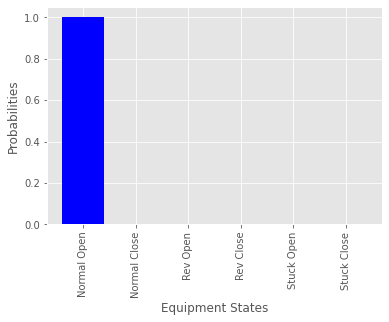

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['Normal, Open','Normal, Close','Reverse, Open','Reverse, Close','Stuck Open','Stuck Close']

x_pos = [i for i,_ in enumerate(x)]

plt.bar(x_pos,results,color='blue')
plt.xlabel("Equipment States")
plt.ylabel("Probabilities")

plt.xticks(x_pos,x,rotation='vertical')

# Adding K-fold Cross Validation

In [26]:
from sklearn.model_selection import KFold
import numpy as np

num_folds = 10

# Define fold score containers
acc_per_fold = []
loss_per_fold = []

kfold = KFold(n_splits=num_folds)

fold_no = 1
for train,test in kfold.split(df.to_numpy(),target_df.to_numpy()):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation='relu',
                          input_dim=4),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
             metrics=['accuracy'])
    
    print('-----------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit model
    history = model.fit(df.to_numpy()[train],target_df.to_numpy()[train],
                   batch_size=10,
                   epochs=5,
                   verbose=1)
    
    # Generate metrics
    scores = model.evaluate(df.to_numpy()[test],target_df.to_numpy()[test],verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    

-----------------------------------
Training for fold 1 ...
Epoch 1/5
1080/1080 [==============================] - 1s 893us/step - loss: 0.6452 - accuracy: 0.7800
Epoch 2/5
1080/1080 [==============================] - 1s 1ms/step - loss: 0.0445 - accuracy: 0.9894
Epoch 3/5
1080/1080 [==============================] - 1s 792us/step - loss: 0.0200 - accuracy: 0.9945
Epoch 4/5
1080/1080 [==============================] - 1s 896us/step - loss: 0.0149 - accuracy: 0.9944
Epoch 5/5
1080/1080 [==============================] - 1s 793us/step - loss: 0.0108 - accuracy: 0.9962
Score for fold 1: loss of 0.00026966282166540623; accuracy of 100.0%
-----------------------------------
Training for fold 2 ...
Epoch 1/5
1080/1080 [==============================] - 1s 725us/step - loss: 0.7990 - accuracy: 0.7384
Epoch 2/5
1080/1080 [==============================] - 1s 766us/step - loss: 0.1166 - accuracy: 0.9666
Epoch 3/5
1080/1080 [==============================] - 1s 759us/step - loss: 0.0443 - accura

In [27]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.00026966282166540623 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0007021224009804428 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.0003818473778665066 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 4 - Loss: 8.858912769937888e-05 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.0002013433404499665 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.00015003579028416425 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 7 - Loss: 0.00046886681229807436 - Accuracy: